# Artificial Neural Network

## Artificial neurons - an early history
- in order to design AI, the first concept of a simplified brain cell called **McCulloch-Pitts (MCP)** neuron was published in 1943
    - named after the scientists
- Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals
![Image](./images/02_01.png)
- nerve cell is a simple logic gate with binary outputs
- multiple signals arrive at the dendrites, then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon
- in 1957, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model
- the proposed algorithm is a rule that would automatically learn the optimal weight coefficients that would then be multiplied with the input features in order to make a decision of whether a neuron fires (transmits a signal) or not
- in supervised learning and binary classification problem, such an algorithm could then be used to predict whether a new data point belongs to one class or the other

## The formal definition of an artificial neuron

- using the context of a binary classification task with binary output 1 - (positive class ) and 0 (negative class)
- a decision function can be defined as $\phi(z)$ that takes a linear combination of certain input values, $x$, and a corresponding weight vector $w$, i.e.
    - $z = w_1x_1 + w_2x_2 + ... + w_mx_m + b$:
    - $w = [w_1, w_2, ...w_m]$
    - $x = [x_1, x_2, ...x_m]$
    
- $\phi(z) = \begin{cases} 1 & \text{if} z \ge \text{0,} \\
               0 & \text{otherwise.}
              \end{cases}$
- for some sample $x^{(1)}$, if the net input $\phi(z)$ is greater than $0$, we predict class $1$, and class $-1$ otherwise
- the following figure illustrates how the net input $z= w^Tx + b$ is squashed into a binary output (1 or 0) by the decision function of the perceptron (left subfigure) and how it can discriminate between two linearly separable classes (right subfigure)
![](./images/PerceptronDecisionFunction.png)

## The perceptron learning rule

- the whole idea behind MCP and Rosenblatt's thresshold perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either *fires* or it *doesn't*
- Rosenblatt's initial perceptron algorithm can be summarized as
    1. Initialize the weights to 0 or small random numbers
    2. For each training sample, $x^{i}$:
    
        a. Compute the output value, $\hat{y}$.
        
        b. Update the weights and bias unit
        
- the unit step function updates each weight, $w_j$ in the weight vector, $w$:
    - $ W_j := W_j + \triangle W_j$
    - $ b:= b + \triangle b$
- the change in $w_j$ or the update value is calculated by the perceptron learning rule as:
    - $\triangle w_j = \eta(y^i - \hat y^i) x_j^i$
    - $\triangle b = \eta(y^i - \hat y^i)$
    - where $\eta$ - **learning rate** typically a const value between 0.0 and 1.0
    - $y^i$ is the **true class label** of the $i^{th}$ training sample
    - $\hat y^i$ is the **predicted class label**
    
- walk through of the alogorithm:
- two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged, since the update values are 0
    1. $y^i = -1, \hat y^i = -1, \triangle w_j = \eta(-1-(-1))x_j^i = 0$
    2. $y^i = 1, \hat y^i = 1, \triangle w_j = \eta(1-1)x_j^i = 0$
- in the case of a wrong prediction, the weights are being pushed toward the direction of the actual target class:
    1. $y^i = -1, \hat y^i = 1, \triangle w_j = \eta(-1-1)x_j^i = \eta(-2)x_j^i$
    2. $y^i = 1, \hat y^i = -1, \triangle w_j = \eta(1-(-1)x_j^i = \eta(2)x_j^i$ 
    
- to better understand, let's use some concrete values to calculate the outcome of $\triangle w_j$
- let's assume that $x_j^i = 0.5$ and the algorithm misclassifies the example as $-1$, then:
    - $\triangle w_j = (1-(-1))0.5 = (2)0.5 = 1$
- in this case, we would increase the weight by 1 so that the net input, $x_j^i \times w_j$ would be more positive next time we encounter this example and thus be more likely to be above the threshold of the unit step function to classify the example as *+1*
- the weight update is proportional to the feature value $x_j^i$
- **important**: note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small
- we need to set a maximum number of passes over the training dataset (**epochs**) and/or a threshold for the number of tolerated misclassifications
    - the perceptron would never stop updating the weights otherwise
- the following figure illustrates linearly separable classes vs no linearly separable classes
![](./images/Linear-NonLinearSeparable.png)

- the following figure summarizes the perceptron algorithm:
![](./images/PerceptronWtUpdates.png)

## Implementing a perceptron learning algorithm in Python

## An object-oriented perceptron API
- mimics API of ML classifiers implemented in sci-kit learn library

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # initialize weight to a vector of size equal to # of features (dimensions)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # weight vector self.w_ is initialized with small random numbers drawn from a normal distribution
        # with standard deviation 0.01 via rgen.normal()
        self.b_ = np.float_(0)
        self.errors_ = [] # count of misclassified samples
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                delta = self.eta * (target - self.predict(xi))
                self.w_ += delta * xi
                self.b_ += delta
                errors += int(delta != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Training a perceptron model on the Iris dataset

### Reading-in the Iris data

In [9]:
import os
import pandas as pd

In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url,
                 header=None,
                 encoding='utf-8')

In [11]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Preprocess the dataset
- though Iris data has 4 features, let's just use sepal length and petal length
    - will allow us to visualize the decision regions of the trained model using scatter plot
- also let's just consider two classes, Setosa and Versicolar (for practical reasons)
    - remeber the perceptron is a binary classifier
    - however, perceptron can be extended to multi-class classification using e.g., **one-vs-all (OvA)** technqiue

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
# convert 'Iris-setosa' to 0 and Versicolor to 1
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length; use just two features
X = df.iloc[0:100, [0, 2]].values

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

### plot the dataset

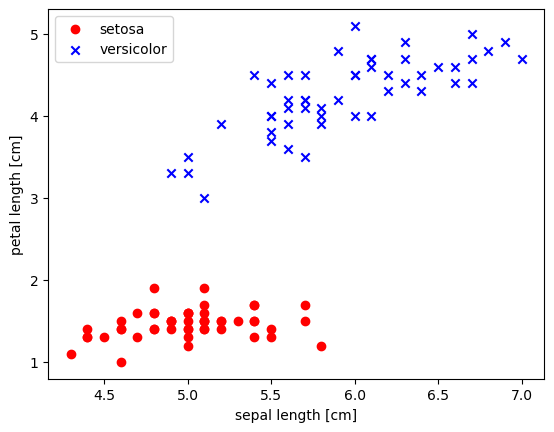

In [17]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Training the perceptron model
- plot the errors (# of misclassified samples) after each epoch

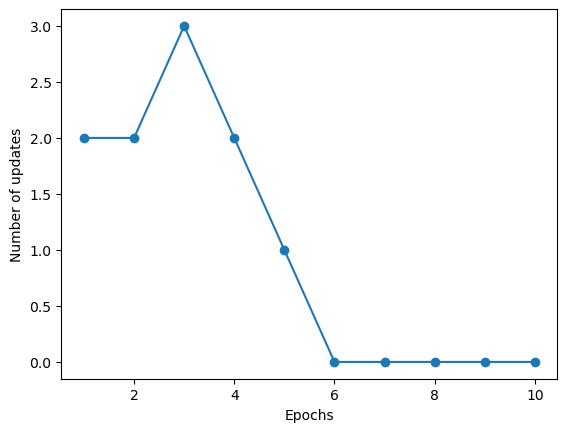

In [18]:
ppn = Perceptron(eta=0.1, n_iter=10) # run 10 epochs with learning rate of 0.1

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### A function for plotting decision regions
- uses matplot lib's `countourf` function to draw the different regions with different colors

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

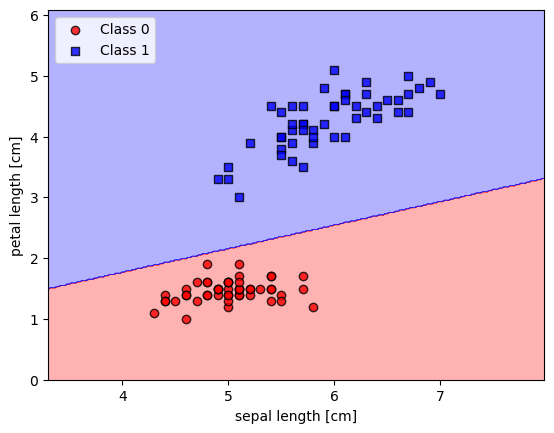

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# Adaptive linear neurons and the convergence of learning

## Single-layer neural network
- let's look into the single layer neural network (NN)

### ADAptive LInear NEuron (Adaline)
- published by Bernard Widrow and his doctoral student Tedd Hoff (in 1960) 3 years after Roseblatt's perceptron algorithm
    - can be considered an improvement over percetron learning algorithm
- Adaline algorithm illustrates the key concepts of defining and minimizing continuous cost functions
    - foundations for understanding more advanced machine learning algorithms for classification, such as logistic regression, support vector machines (SVMs), and regression models
- key difference between Adaline rule and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron
- the difference is illustrated in the following figure

![](./images/PerceptronVsAdaline.jpg)

## Minimizing cost functions with gradient descent
- in supervised ML algorithms, objective/activation function must be defined and optimized during the learning process
- the objective function is often a cost function that we want to minimize
- in Adaline, we can define the cost function, $L$, to learn the weights as the **sum of mean squared errors (MSE)** between the calculated outcome and the true class label
    - $L(w, b) = \frac{1}{2n}\sum_{i}(y^i - \sigma(z^i))^2$
- some advantages of this continuous linear activation function:
    - it's differentiable
    - it's convex; we can use a very simple yet powerful optimization algorithm called gradient descent to find the weights that minimizes the cost function
- as illustrated in the figure below, gradient descent can be described as *climbing down a hill* until a local or global cost minimum is reached
- in each step, we take a step in the opposite direction of the gradient, where the step size is determined by the value of the learning rate and the slope of the gradient
![](./images/GradientDescent.jpg)

- using **gradient descent**, update the weights by taking a step in the opposite direction of the gradient, $\triangle L(W)$ of the cost function, $L(w)$:
    - $w := w + \triangle w$
    - $ b := b + \triangle b$
    - $\triangle w = -\eta \triangle L(w)$ : -ve gradient multiplied by th learning rate $\eta$
- gradient of the cost function is computed by the partial derivative of the cost function wrt each weight, $w_j$:
    - $\frac{\partial L}{\partial w_j} = - \sum_{i} (y^i - \phi(z^i))x_j^i$
    - $\triangle w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i(y^i - \phi(x^i))x_j^i$
- since, all weights are updated simultaneously, Adaline learning rule becomes:
    - $w := w + \triangle w$

## Convergence in neural networks
- is covered more in Deep Learning chapter
![](./images/12_13.png)

## Implementing an adaptive linear neuron in Python

In [30]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        # no effect on X; it's simply an identity function
        # can be modified to non-identity, nolinear activation function
        # Logistic Regression is similar to Adaline; difference is cost and activation function
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Perceptron hyperparameters
- the learning rate, $\eta$ (`eta`) and the number of epochs (`n_iter`) are hyperparameters (or tuning parameters)
- requires some experimentation to find a good learning rate $\eta$ for optimal convergence
- let's choose two different learning rates, $eta = 0.1$ and $\eta = 0.0001$ and plot the cost functions versus the # of epochs

/var/folders/4f/1pkkv7h960j42p0ppgk9n4ywjr6t_b/T/ipykernel_38551/1452885003.py:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


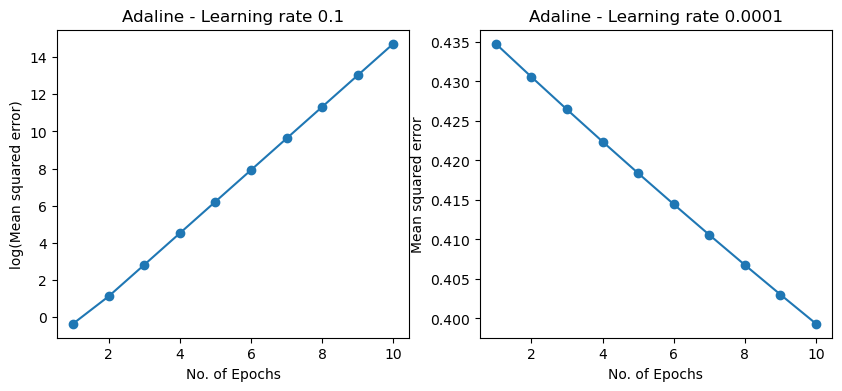

In [31]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### observations from the above charts
- left chart shows what could happen if we choose a learning rate that is too large
    - instead of minimizing the loss function, the error becomes larger in every epoch
    - we *overshoot* the global minimum
- the right chart shows error decreases but the chosen learning rate $eta = 0.0001$ is so small that the algorithm would require a large number of epochs to converge to the global minimum 

- the following figures illustrate what might happen if we choose different learning rates
    - left one is for small learning rate and the right one is for larger learning rate
![](./images/02_12.png)

## Improving gradient descent through feature scaling
- Gradient descent is one of the many ML algorithms that benefit from feature scaling
- **Standardization** technique gives data the properties of standard normal distribution: zero-mean and unit variance as shown in the figure below
    - standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance)
![](./images/GradientDescentFeatureScaling.jpg)
- e.g. to standardize the $j^{th}$ feature, we can simply subtract the sample mean, $\mu_j$, from every training example and divide it by its standard deviation, $\sigma_j$:

    - $ x^\prime_j = \frac {x_j - \mu_j}{\sigma j}$
    - $x_j$ is a vector consisting of the $j^{th}$ feature values of all training samples, $n$, and this standarization technique is applied to each feature, $j$ in the dataset
- let's standarize Iris dataset and apply AdalineGD

In [32]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

/var/folders/4f/1pkkv7h960j42p0ppgk9n4ywjr6t_b/T/ipykernel_38551/1452885003.py:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


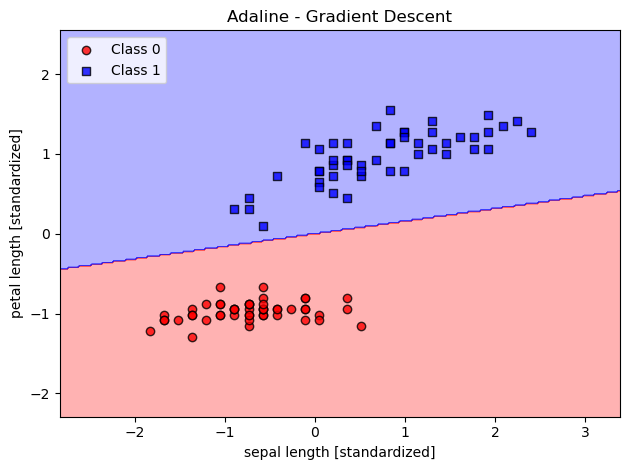

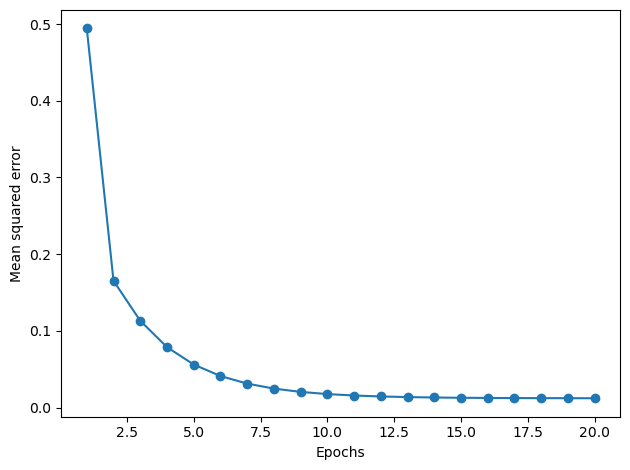

In [33]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

# draw mean squared error chart over different epocs
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

<br>
<br>

## Large scale machine learning and stochastic gradient descent
- in the Adaline above, Gradient descent is applied to the whole dataset to minimize the cost function
- this technique is also referred to as **batch gradient descent**
- what if you need to work on a very large dataset with millions of data points
    - running batch gradient descent can be computationally quite costly
    - as we need to re-evalute the whole training dataset at every epoch as we take one step toward the global minimum
    
### stochastic gradient descent (SGD)
- also called iterative or online gradient descent
- instead of updating the weights based on the sum of the accumulated errors over all training examples, $X$:
    - $\triangle w = \eta \sum_i (y^i - \phi(z^i))x^i$
- we update the weights incrementally for each example:
    - $\triangle w = \eta (y^i - \phi(z^i))x^i$
- in SGD, the fixed learning rate, $\eta$ is often replaced by an adaptive learning rate that decreases over time, e.g.:
    - $\eta = \frac{c1}{number\_of\_epocs+c2}$
    
### online learning
- SGD can be used for online learning where model is trained on the fly as new training data arrives
    - very useful where large volume of data is accumulated over time
    - e.g., customer data in web application
- using online learing, the system can immediately adapt to change and the training data can be discarded after updating the model if storage space is an issue
- the following implementation of `AdalineSGD` adopts on `AdalineGD` algorithm implemented above
- `fit()` method reinitializes the weights after each call
- `partial_fit()` method is added for online learning so the weights are not reinitialized for each sample/batch

In [41]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                # data may need to shuffle every epoch to prevent cycles
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            # initializes only once...
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * error
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

/var/folders/4f/1pkkv7h960j42p0ppgk9n4ywjr6t_b/T/ipykernel_38551/2476319382.py:85: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


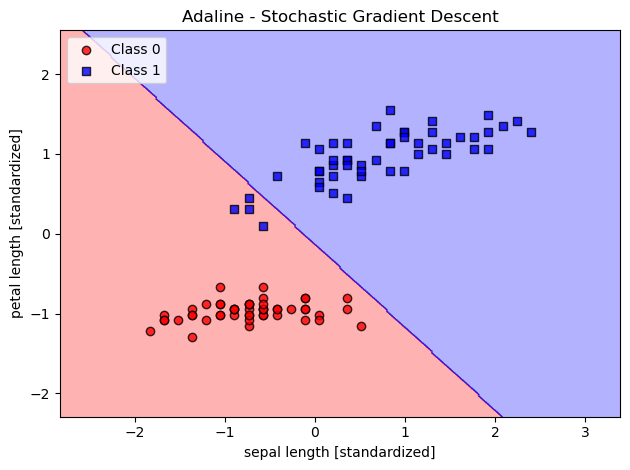

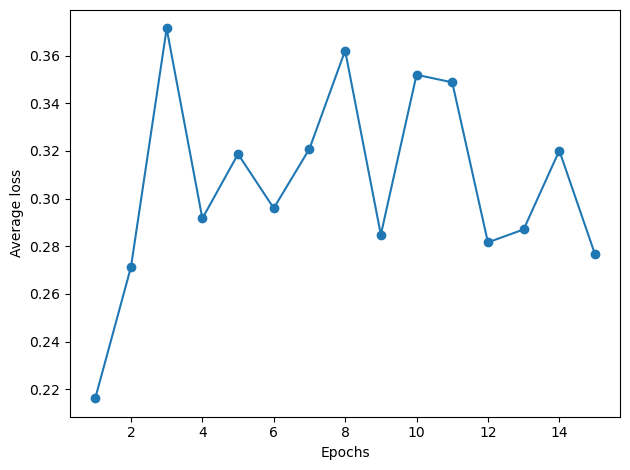

In [43]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

- average cost goes down pretty quickly and the final decision boundary after 15 epochs looks similar to the batch Adaline Gradient Descent
- if we want to update our model with streaming data, we simply call `paritial_fit()` method passing individual training example

In [ ]:
# for online training, we can simply call partial fit by passing one sample at a time
ada_sgd.partial_fit(X_std[0, :], y[0])

## Logistic Regression and conditional probabilities

- a classification model that is very easy to implement
- performs very well on linearly separable classes
- similar to Perceptron and Adaline, it's a linear model for binary classification
- it can be generalized to multiclass settings
    - known as multinomial logitic regression or softmax regression
    - use OvR technique
- to understand probabilistic model, let's explain some statistical terms

### odds
- the odds in favor of a particular event
- can be written as: $\frac{p}{1-p}$
    - where $p$ stands for probability of positive event
    - positive event doesn't mean "good" but any event that you want to predict

### logit
- `logit` function is simply the logarithm of `odds`
- $logit(p) = log\frac{p}{1-p}$
    - `log` refers to natural logarithm, base $e$
- $logit(p(y=1|x) = log\frac{p}{1-p} = w_0x_0 + w_1x_1 + ... + w_mx_m$
    - = $\sum_{i=1}^{m}w_ix_i = \textbf{w}^T\textbf{x}$
- $logit(p(y=1|x)$ is the conditional probability that a particular sample belongs to a class 1 given its features $\textbf{x}$
- predicting the probability that a certain sample belongs to a particular class is the inverse form of the logit function
- also called the **logistic sigmoid function** or just **sigmoid function** due to its $S$-shape:
    - $\phi(z) = \frac{1}{1+e^{-z}}$
    - $z$ is the net input, linear combination of weights and the inputs (features associated with the training samples)
    - $z = \textbf{w}^{T}\textbf{x} = w_0x_0 + w_1x_1 + ... + w_mx_m$
    
- let's plot the **sigmoid** for some values in the range -7 to 7

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [37]:
def drawSigmoid():
    z = np.arange(-7, 7, 0.1)
    phi_z = sigmoid(z)
    plt.plot(z, phi_z)
    plt.axvline(0.0, color='k')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('z')
    plt.ylabel('$\phi (z)$')
    # y axis ticks and gridline
    plt.yticks([0.0, 0.5, 1.0])
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()
    

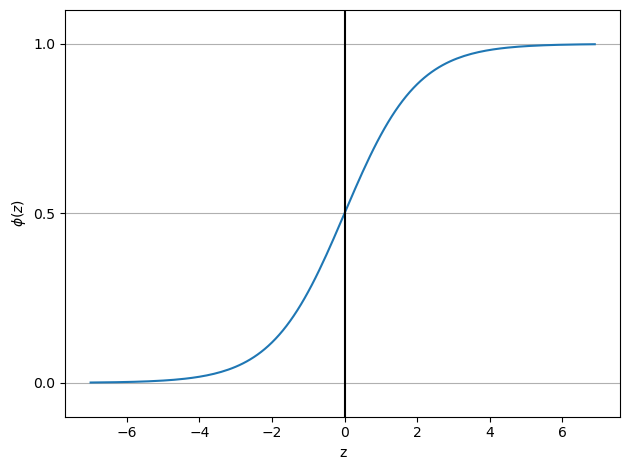

In [38]:
drawSigmoid()

- in Adaline, we use the identify function, $\phi(z) = z$, as the activation function
- in logistic regression, we use sigmoid function as the activation function
- the following diagram illustrates the difference between Adaline and logistic regression

![Adaline Vs Logistic Regression](./images/03_03.png)

- the predictive probability can be simply converted into a binary outcome via a threshold function:
- $ \hat y = \begin{cases} 1 &  \text{if} \phi (z) \ge \text{0.5,} \\
               -1 & \text{otherwise.}
              \end{cases}$
- which is equivalent to:
$ \hat y = \begin{cases} 1 & z \ge \text{0.0,} \\
               -1 & \text{otherwise.}
              \end{cases}$
- there are many applications of logistic regression where the estimation of class-membership probability can be very important:
    - weather prediction; chance of precipitation - 85%
    - chance that a patient has a disease given certain symptoms - LR is very popular in medical field!

## Converting Adaline implementation into logistic regression
- simply substitute the cost function, $J$ in Adaline implementation with the new cost function
- $ J(w) = - \sum_{i} y^{i}log(\phi(z^i)) + (1-y^i)log(1-\phi (z^i))$
    - use this to compute the cost of classifying all training samples per epoch
- swap the linear activation function with the sigmoid activation
- change the threshold function to return class labels $0$ or $1$, instead of $-1$ or $1$

In [34]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


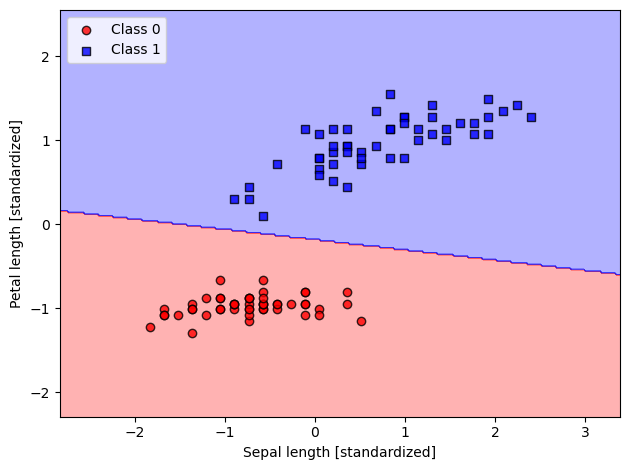

In [35]:
# plotting decicion boundaries of LRGD model
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_std, y)

plot_decision_regions(X=X_std, 
                      y=y,
                      classifier=lrgd)

plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()